In [33]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

In [26]:
# 文件读取
column_name = ['Sample code number', 'Clump Thickness',
               'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
               'Single Epithelial Cell Size',
               'Bare Nuclei', 'Bland Chromatin',
               'Normal Nucleoli', 'Mitoses', 'Class']
original_data = pd.read_csv('../Data/breast-cancer-wisconsin.data',names=column_name)
original_data.head()
# 缺失值处理
# 第一步先替换 ? 为 nan
data = original_data.replace(to_replace="?", value=np.nan)
data.dropna(inplace=True)
print("检测是否还有缺失值(全为false表示没有缺失值)")  # 检测是否还有缺失值
print(data.isnull().any())
# 第三步 筛选特征值和目标值
x = data.iloc[:, 1:-1]  # 表示每一行数据都要, 从第一列到倒数第二列的column字段也要
y = data["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y)

检测是否还有缺失值(全为false表示没有缺失值)
Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool


In [27]:
# 第四步: 开始特征工程
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# 第五步, 预估器流程
estimator = LogisticRegression()  # 默认参数
estimator.fit(x_train, y_train)
print("逻辑回归_权重系数为: ", estimator.coef_)
print("逻辑回归_偏置为:", estimator.intercept_)
# 第六步, 模型评估
y_predict = estimator.predict(x_test)
print("逻辑回归_预测结果", y_predict)
print("逻辑回归_预测结果对比:", y_test == y_predict)
score = estimator.score(x_test, y_test)
print("准确率为:", score)
# 2是良性的 4是恶性的
"""
但是实际上这个预测结果不是我们想要的, 以上只能说明预测的正确与否,
而事实上, 我们需要一种评估方式来显示我们对恶性breast的预测成功率, 也就是召回率
同时可以查看F1-score的稳健性
(召回率和精确率看笔记和截图)
所以下面换一种评估方法
"""

逻辑回归_权重系数为:  [[1.29472916 0.34073009 0.62685972 0.89541749 0.26073089 1.19993458
  1.12891505 0.54143577 1.08360566]]
逻辑回归_偏置为: [-1.18952183]
逻辑回归_预测结果 [2 2 4 4 2 2 4 2 2 2 2 4 2 2 4 2 4 2 2 2 2 4 2 4 2 2 2 4 2 2 2 4 2 2 4 2 2
 2 2 4 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 4 4 2 2 4 4 4 2 2 4 2 2 4 4 4 4 4 2 4
 4 2 2 2 4 2 2 4 2 4 4 4 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 2 2 4
 4 4 4 2 2 2 2 2 4 2 2 4 2 2 4 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 4 2 4 2 2
 4 2 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 4 4 2 4]
逻辑回归_预测结果对比: 202    True
69     True
465    True
49     True
689    True
       ... 
457    True
493    True
60     True
140    True
210    True
Name: Class, Length: 171, dtype: bool
准确率为: 0.9649122807017544


'\n但是实际上这个预测结果不是我们想要的, 以上只能说明预测的正确与否,\n而事实上, 我们需要一种评估方式来显示我们对恶性breast的预测成功率, 也就是召回率\n同时可以查看F1-score的稳健性\n(召回率和精确率看笔记和截图)\n所以下面换一种评估方法\n'

In [28]:
Score = classification_report(y_test, y_predict, labels=[2, 4],
                              target_names=["良性", "恶性"])
print("查看精确率,召回率,F1-score\n", Score)
# support表示样本量

查看精确率,召回率,F1-score
               precision    recall  f1-score   support

          良性       0.97      0.97      0.97       104
          恶性       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



ROC曲线和AUC返回值为(三角形面积) 0.9631888633754305


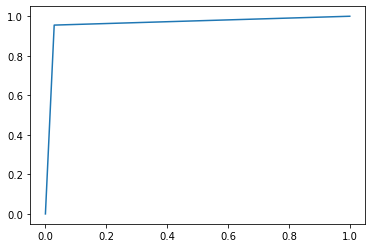

In [29]:
"""
ROC曲线和AUC指标(样本分类不均衡的情况下,可以使用这种方法)
AUC = 0.5 是瞎猜模型
AUC = 1 是最好的模型
AUC < 0.5 属于反向毒奶
更多的看截图
"""
# 需要转换为0,1表示
y_true = np.where(y_test > 3, 1, 0)  # 表示大于3为1,反之为0(class值为2和4)
return_value = roc_auc_score(y_true, y_predict)
print("ROC曲线和AUC返回值为(三角形面积)", return_value)

fpr, tpr, thresholds = roc_curve(y_true, y_predict)
plt.plot(fpr, tpr)
plt.show()

In [34]:
joblib.dump(estimator,'Cancer-estimator-by-logistic-regression.pkl')

['Cancer-estimator-by-logistic-regression.pkl']